<a href="https://colab.research.google.com/github/kylelee417/Data-Science_Portfolio/blob/master/chest_pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 !pip install -U -q PyDrive ## you will have install for every colab session

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 3.4MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt #Ploting charts
from glob import glob #retriving an array of files in directories
from keras.models import Sequential #for neural network models
from keras.layers import Dense, Dropout, Flatten, ZeroPadding2D, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator #Data augmentation and preprocessing
from keras.utils import to_categorical #For One-hot Encoding
from keras.optimizers import Adam, SGD, RMSprop #For Optimizing the Neural Network
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [4]:
#Checking dataset
import os
paths = os.listdir(path="/content/gdrive/My Drive/chest_xray/")
print(paths)

['val', 'test', '.DS_Store', 'train']


In [0]:
#Path to all image data
train_path = "/content/gdrive/My Drive/chest_xray/train"
dev_path = "/content/gdrive/My Drive/chest_xray/val"
test_path = "/content/gdrive/My Drive/chest_xray/test"

In [0]:
#Getting all normal and pneumonia images from the folder
img_pne = glob(train_path+"/PNEUMONIA/*.jpeg")
img_norm = glob(train_path+"/NORMAL/*.jpeg")

In [7]:
len(img_pne)

3875

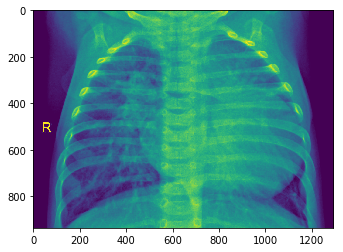

In [8]:
#First pnumonia image
img_pne_0 = np.asarray(plt.imread(img_pne[0]))
plt.imshow(img_pne_0)



In [9]:
img_pne_0.shape

(936, 1292)

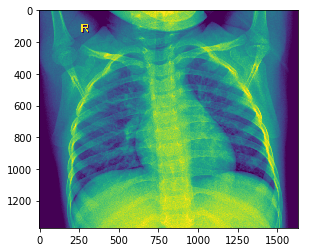

In [10]:
img_norm_0 = np.asarray(plt.imread(img_norm[0]))
plt.imshow(img_norm_0)

In [11]:
img_norm_0.shape

(1372, 1634)

In [0]:
img_pne_5 =img_pne[:5]
img_norm_5 =img_norm[:5]

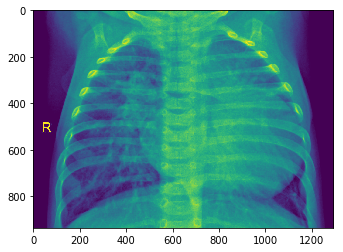

In [13]:
img_pne_5[0]
img_pne_0 = np.asarray(plt.imread(img_pne[0]))
plt.imshow(img_pne_0)

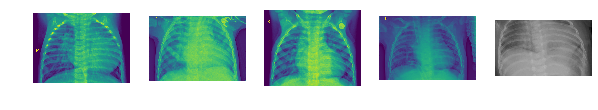

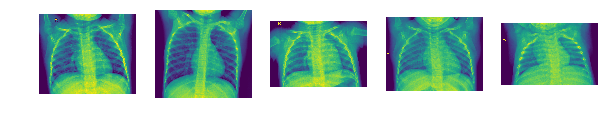

In [14]:
fig,axes = plt.subplots(1,5,figsize=(10,20))
for ax,img in zip(axes,img_pne_5):
  img = np.asarray(plt.imread(img))
  ax.imshow(img)
  ax.axis('off')
fig,axes = plt.subplots(1,5,figsize=(10,20))
for ax,img in zip(axes,img_norm_5):
  img = np.asarray(plt.imread(img))
  ax.imshow(img)
  ax.axis('off')


In [0]:
#Data preprocessing and analysis
classes = ["NORMAL", "PNEUMONIA"]
train_data = glob(train_path+"/NORMAL/*.jpeg")
train_data += glob(train_path+"/PNEUMONIA/*.jpeg")
data_gen = ImageDataGenerator(rescale=1./255)

In [85]:
train_batches = data_gen.flow_from_directory(train_path, target_size = (224, 224), classes = classes, class_mode = "binary",batch_size=16)
val_batches = data_gen.flow_from_directory(dev_path, target_size = (224, 224), classes = classes, class_mode = "binary",batch_size=16)
test_batches = data_gen.flow_from_directory(test_path, target_size = (224, 224), classes = classes, class_mode = "binary",batch_size=16)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [45]:
os.getcwd()

'/content'

In [0]:
#Transfer learning from a convolutional ANN model
#VGG16 model
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=train_batches.image_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [0]:
epochs = 5
learning_rate = 0.0005

In [0]:
optimizer = Adam(lr = 0.0001)
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [61]:

hist = model.fit_generator(epochs=20,
                           shuffle=True,
                           validation_data=val_batches,
                           generator=train_batches,
                           steps_per_epoch=np.ceil(len(train_batches) / 16),
                           validation_steps=10,
                           verbose=1)

Epoch 1/20
21/21 [==============================] - 18s 839ms/step - loss: 0.4361 - acc: 0.7768 - val_loss: 0.6431 - val_acc: 0.5625
Epoch 2/20
21/21 [==============================] - 15s 708ms/step - loss: 0.3424 - acc: 0.8304 - val_loss: 0.9131 - val_acc: 0.6250
Epoch 3/20
21/21 [==============================] - 17s 804ms/step - loss: 0.4674 - acc: 0.7946 - val_loss: 1.6904 - val_acc: 0.5625
Epoch 4/20
21/21 [==============================] - 17s 798ms/step - loss: 0.3918 - acc: 0.8036 - val_loss: 0.8650 - val_acc: 0.5625
Epoch 5/20
21/21 [==============================] - 15s 691ms/step - loss: 0.2721 - acc: 0.8839 - val_loss: 1.7191 - val_acc: 0.5625
Epoch 6/20
21/21 [==============================] - 14s 645ms/step - loss: 0.2924 - acc: 0.8571 - val_loss: 1.0696 - val_acc: 0.5625
Epoch 7/20
21/21 [==============================] - 18s 878ms/step - loss: 0.3149 - acc: 0.8601 - val_loss: 0.8853 - val_acc: 0.6875
Epoch 8/20
21/21 [==============================] - 16s 756ms/step - 

In [0]:
def training_plot(hist,model_name):
    loss = [hist.history['loss'],hist.history['val_loss']]
    acc = [hist.history['acc'],hist.history['val_acc']]
    
    fig, axes = plt.subplots(1,2,figsize = (15,3))
    fig.suptitle(model_name)
    for ax,val,name in zip(axes,(loss,acc),['loss','accuracy']):
        ax.plot(val[0], color='b', label="Training")
        ax.plot(val[1], color='r', label="Validation")
        ax.legend(loc='best')
        ax.set_xlabel('epoch')
        ax.set_ylabel('')
        ax.set_title(name)

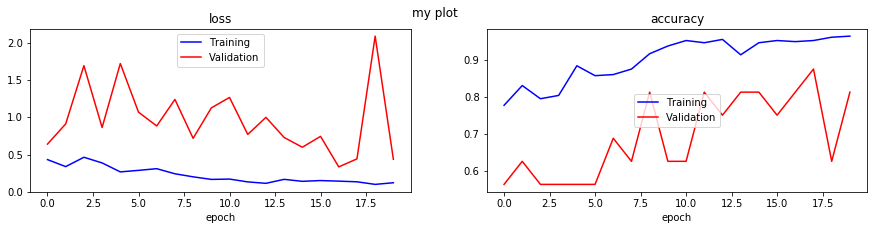

In [64]:
training_plot(hist,'my plot')

In [43]:

hist_2 = model.fit_generator(epochs=5,
                           shuffle=True,
                           validation_data=val_batches,
                           generator=train_batches,
                           steps_per_epoch=np.ceil(len(train_batches) / 16),
                           validation_steps=10,
                           verbose=1)

Epoch 1/5
21/21 [==============================] - 66s 3s/step - loss: 0.4234 - acc: 0.7202 - val_loss: 1.5349 - val_acc: 0.5000
Epoch 2/5
21/21 [==============================] - 66s 3s/step - loss: 0.3606 - acc: 0.8155 - val_loss: 0.7219 - val_acc: 0.6250
Epoch 3/5
21/21 [==============================] - 62s 3s/step - loss: 0.3868 - acc: 0.8244 - val_loss: 0.7550 - val_acc: 0.5625
Epoch 4/5
21/21 [==============================] - 64s 3s/step - loss: 0.3942 - acc: 0.8095 - val_loss: 0.8968 - val_acc: 0.5625
Epoch 5/5
21/21 [==============================] - 61s 3s/step - loss: 0.3118 - acc: 0.8214 - val_loss: 1.4069 - val_acc: 0.5625


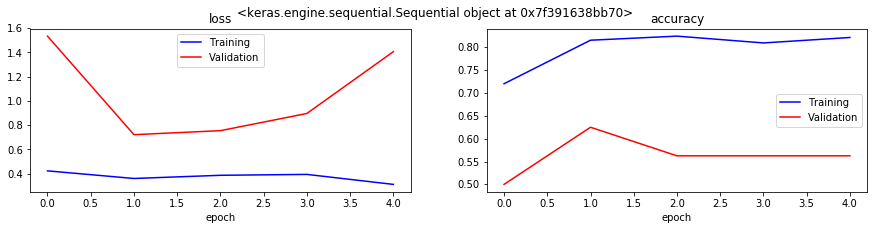

In [51]:
training_plot(hist_2,model)

In [0]:
def print_valid_test_score(model,X_valid,y_valid,X_test,y_test):
    valid_loss,valid_accuracy = model.evaluate(X_valid, y_valid)
    test_loss,test_accuracy = model.evaluate(X_test, y_test)
    print("Valid: accuracy = %f  ;  loss = %f" % (valid_accuracy, valid_loss))
    print("Test: accuracy = %f  ;  loss = %f" % (test_accuracy, test_loss))

In [68]:
len(test_batches)

624

In [71]:
test_batches

In [0]:
predict = model.predict_generator(test_batches,test_batches.samples // test_batches.batch_size)

In [87]:
len(predict)

624

In [0]:
empt = []
for i in predict:
  if i < 0.5:
    i = 0
  else:
    i = 1
  empt.append(i)
    

In [89]:
print(confusion_matrix(test_batches.classes, empt))

[[ 31 203]
 [ 35 355]]


In [0]:
from sklearn.metrics import classification_report, confusion_matrix